<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Johannah, my name is Dmitrii. Happy to review your project! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 



<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall well done! I can see that a lot of effort has been made! Your project already looks really good, and you accomplished impressive results.

No critical issues are left, so your project has been accepted. Congratulations! However, I want to send it back to you in case you have any questions along the way or you want to make additional changes to the project.
  
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.


<div style="border:solid blue 2px; padding: 20px"


Hi Dimitri! Thank you very much for your useful feed back I will be implimenting your suggestions for this project as soon as possible. Thanks again

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Hi Johannah! I did not notice any new code or questions, but as I mentioned, there are no critical issues, so your project has been accepted! Wish you cool projects in the next sprints ☘️
    
PS: As a last thing, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  🙌

</div>

# Which one is a better plan?

Megaline company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

I will carry out a preliminary analysis of the plans based on a relatively small client selection. I have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018.

My purpose is to analyze the clients' behavior and determine which prepaid plan brings in more revenue. Preliminarily I will review the datasets and amend the data as needed. Then I will enrich the data with derivitaves from the original which will aid me in my downstream ananlysis. Once the data is complete I will perform statistical and visual analytics to help me draw my conclusions. 

Thank you for your time reviewing this project!



<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and tasks.

## Initialization

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
calls_data=pd.read_csv(r'/datasets/megaline_calls.csv') 
internet_data=pd.read_csv(r'/datasets/megaline_internet.csv') 
messages_data=pd.read_csv(r'/datasets/megaline_messages.csv') 
plans_data=pd.read_csv(r'/datasets/megaline_plans.csv') 
users_data=pd.read_csv(r'/datasets/megaline_users.csv') 


## Prepare the data

These data are separated into several dataframes, I will review each and process any issues I uncover.

## Plans

In [3]:
plans_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
plans_data.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Everything in this dataframe looks accurate from the information I was given about the plans.

## Users

In [5]:
users_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
users_data.head(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


### Fix Data

I see that churn date is missing a lot of data.I will fill the NaN with 0 to indicate the user has not cancelled their service.

In [7]:
users_data['churn_date']=users_data['churn_date'].fillna(0)
users_data.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,0
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,0
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,0
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,0
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,0


I will change the dtype to datetime for the reg_date column

In [8]:
users_data['reg_date']=pd.to_datetime(users_data['reg_date'])
users_data.info()
users_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,0


## Calls

In [9]:
calls_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
calls_data.head(17)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


 I will change the call date dtype to datetime

### Fix data

In [11]:
calls_data['call_date']=pd.to_datetime(calls_data['call_date'])
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


now I will make a new column and extract the month calls were placed

In [12]:
calls_data['month']= calls_data['call_date'].dt.month
calls_data.head(10)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
5,1000_388,1000,2018-12-31,2.20,12
6,1000_510,1000,2018-12-27,5.75,12
7,1000_521,1000,2018-12-28,14.18,12
8,1000_530,1000,2018-12-28,5.77,12
9,1000_544,1000,2018-12-26,4.40,12


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
 In this case, we only have data for a year, and the "month" method works fine. But for other datasets, this can lead to an error: for example, April 2019 and April 2021 will result in the same number. To display all information, you can use the astype('datetime64[M]') method. It converts the date to the format first day - month - year.

### Enrich data

The duration needs to be rounded to the next minute to be in accordance with megaline's plan requirements

In [13]:
calls_data['duration']=np.ceil(calls_data['duration'])
calls_data

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,11
137731,1499_200,1499,2018-10-20,11.0,10
137732,1499_201,1499,2018-09-21,9.0,9
137733,1499_202,1499,2018-10-10,1.0,10


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Ok, great job! Good that you added data rounding. Also, great choice of np.ceil () method. 


## Messages

In [14]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
messages_data.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


### Fix data

message_date will be changed to datetime

In [16]:
messages_data['message_date']=pd.to_datetime(messages_data['message_date'])
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

Again I will extract the month the message was placed and make it its own column

In [17]:
messages_data['month']= messages_data['message_date'].dt.month
messages_data.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


## Internet

In [18]:
internet_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
internet_data.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


I will repeat the steps I took before for datetime and extracting the month. 

### Fix data

In [20]:
internet_data['session_date']=pd.to_datetime(internet_data['session_date'])
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

In [21]:
internet_data['month']= internet_data['session_date'].dt.month
internet_data.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


## Study plan conditions

In [22]:
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Good start and first view on data!

Next time, you can also create a function with all data processing steps to run it through all your datasets and avoid repetitive code.

## Aggregate data per user

Now I will aggregate data per user per month in order to have just one record per user per month.

In [23]:
user_calls=calls_data.groupby(['user_id','month'])['user_id'].agg(calls_count='count')
user_calls

calls_count
user_id month             
1000    12              16
1001    8               27
        9               49
        10              65
        11              64
...                    ...
1498    12              39
1499    9               41
        10              53
        11              45
        12              65

[2258 rows x 1 columns]

In [24]:
user_minutes=calls_data.groupby(['user_id','month'])['duration'].agg(total_minutes='sum')
user_minutes

total_minutes
user_id month               
1000    12             124.0
1001    8              182.0
        9              315.0
        10             393.0
        11             426.0
...                      ...
1498    12             339.0
1499    9              346.0
        10             385.0
        11             308.0
        12             496.0

[2258 rows x 1 columns]

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
In pivot_table or groupby it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:

    data_calls.groupby(['user_id','month']).agg({'duration' : ('count','sum')}).reset_index()

or
    
    data_calls.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('count','sum')).reset_index()

In [25]:
user_messages=messages_data.groupby(['user_id','month'])['user_id'].agg(message_count='count')
user_messages

message_count
user_id month               
1000    12                11
1001    8                 30
        9                 44
        10                53
        11                36
...                      ...
1496    9                 21
        10                18
        11                13
        12                11
1497    12                50

[1806 rows x 1 columns]

In [26]:
user_internet=internet_data.groupby(['user_id', 'month'])['mb_used'].agg(data_usage_mb='sum')
user_internet


data_usage_mb
user_id month               
1000    12           1901.47
1001    8            6919.15
        9           13314.82
        10          22330.49
        11          18504.30
...                      ...
1498    12          23137.69
1499    9           12984.76
        10          19492.43
        11          16813.83
        12          22059.21

[2277 rows x 1 columns]

I will now aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [27]:
users_complete_1=user_calls.merge(user_minutes, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer')

users_complete_2=user_messages.merge(user_internet, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer')



users_complete=users_complete_1.merge(users_complete_2, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer')
users_complete.head()


calls_count  total_minutes  message_count  data_usage_mb
user_id month                                                          
1000    12            16.0          124.0           11.0        1901.47
1001    8             27.0          182.0           30.0        6919.15
        9             49.0          315.0           44.0       13314.82
        10            65.0          393.0           53.0       22330.49
        11            64.0          426.0           36.0       18504.30

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed `how = 'outer' can be used here to prevent data loss.
    
By the way, it is also possible to group 3 tables at once using for example reduce. You can read about it here: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

In [28]:
users_complete= users_complete.eval('avg_call_duration = total_minutes/calls_count')
users_complete

calls_count  total_minutes  message_count  data_usage_mb  \
user_id month                                                             
1000    12            16.0          124.0           11.0        1901.47   
1001    8             27.0          182.0           30.0        6919.15   
        9             49.0          315.0           44.0       13314.82   
        10            65.0          393.0           53.0       22330.49   
        11            64.0          426.0           36.0       18504.30   
...                    ...            ...            ...            ...   
1349    12             NaN            NaN           61.0       13039.91   
1361    5              NaN            NaN            2.0        1519.69   
1482    10             NaN            NaN            2.0            NaN   
1108    12             NaN            NaN            NaN         233.17   
1311    6              NaN            NaN            NaN        1498.83   

               avg_call_duration  
user_id month                     
1000    12              7.750000  
1001    8               6.740741  
        9               6.428571  
        10              6.046154  
        11              6.656250  
...                          ...  
1349    12                   NaN  
1361    5                    NaN  
1482    10                   NaN  
1108    12                   NaN  
1311    6                    NaN  

[2293 rows x 5 columns]

In [29]:
users_complete = users_complete.reset_index()
users_complete.head()

,user_id,month,calls_count,total_minutes,message_count,data_usage_mb,avg_call_duration
0,1000,12,16.0,124.0,11.0,1901.47,7.750000
1,1001,8,27.0,182.0,30.0,6919.15,6.740741
2,1001,9,49.0,315.0,44.0,13314.82,6.428571
3,1001,10,65.0,393.0,53.0,22330.49,6.046154
4,1001,11,64.0,426.0,36.0,18504.30,6.656250


In [30]:
user_plan=users_data[['user_id','plan','city']]
user_plan


,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [31]:
users_complete = user_plan[['user_id', 'plan','city']].merge(
    users_complete,
    left_on='user_id',
    right_on='user_id',
    how='left')

In [32]:
users_complete

,user_id,plan,city,month,calls_count,total_minutes,message_count,data_usage_mb,avg_call_duration
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",12.0,16.0,124.0,11.0,1901.47,7.750000
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",8.0,27.0,182.0,30.0,6919.15,6.740741
2,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",9.0,49.0,315.0,44.0,13314.82,6.428571
3,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",10.0,65.0,393.0,53.0,22330.49,6.046154
4,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",11.0,64.0,426.0,36.0,18504.30,6.656250
...,...,...,...,...,...,...,...,...,...
2298,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",12.0,39.0,339.0,NaN,23137.69,8.692308
2299,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",9.0,41.0,346.0,NaN,12984.76,8.439024
2300,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",10.0,53.0,385.0,NaN,19492.43,7.264151
2301,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",11.0,45.0,308.0,NaN,16813.83,6.844444


Now I will calculate the monthly revenue from each user ( this will be done by subtracting  the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). 

In [33]:
sum_table=pd.pivot_table(users_complete, values= ['data_usage_mb','message_count',
                                                  'total_minutes', 'avg_call_duration'],index=['user_id','month','plan'], aggfunc=np.sum )
sum_table.head(10)


avg_call_duration  data_usage_mb  message_count  \
user_id month plan                                                        
1000    12.0  ultimate           7.750000        1901.47           11.0   
1001    8.0   surf               6.740741        6919.15           30.0   
        9.0   surf               6.428571       13314.82           44.0   
        10.0  surf               6.046154       22330.49           53.0   
        11.0  surf               6.656250       18504.30           36.0   
        12.0  surf               7.357143       19369.18           44.0   
1002    10.0  surf               5.363636        6552.01           15.0   
        11.0  surf               7.018182       19345.08           32.0   
        12.0  surf               8.170213       14396.24           41.0   
1003    12.0  surf               7.409396       27044.14           50.0   

                        total_minutes  
user_id month plan                     
1000    12.0  ultimate          124.0  
1001    8.0   surf              182.0  
        9.0   surf              315.0  
        10.0  surf              393.0  
        11.0  surf              426.0  
        12.0  surf              412.0  
1002    10.0  surf               59.0  
        11.0  surf              386.0  
        12.0  surf              384.0  
1003    12.0  surf             1104.0

In [34]:
sum_table=sum_table.eval('data_usage_gb = data_usage_mb/1024')
sum_table['data_usage_gb']=np.ceil(sum_table['data_usage_gb'])
sum_table

avg_call_duration  data_usage_mb  message_count  \
user_id month plan                                                        
1000    12.0  ultimate           7.750000        1901.47           11.0   
1001    8.0   surf               6.740741        6919.15           30.0   
        9.0   surf               6.428571       13314.82           44.0   
        10.0  surf               6.046154       22330.49           53.0   
        11.0  surf               6.656250       18504.30           36.0   
...                                   ...            ...            ...   
1498    12.0  surf               8.692308       23137.69            0.0   
1499    9.0   surf               8.439024       12984.76            0.0   
        10.0  surf               7.264151       19492.43            0.0   
        11.0  surf               6.844444       16813.83            0.0   
        12.0  surf               7.630769       22059.21            0.0   

                        total_minutes  data_usage_gb  
user_id month plan                                    
1000    12.0  ultimate          124.0            2.0  
1001    8.0   surf              182.0            7.0  
        9.0   surf              315.0           14.0  
        10.0  surf              393.0           22.0  
        11.0  surf              426.0           19.0  
...                               ...            ...  
1498    12.0  surf              339.0           23.0  
1499    9.0   surf              346.0           13.0  
        10.0  surf              385.0           20.0  
        11.0  surf              308.0           17.0  
        12.0  surf              496.0           22.0  

[2293 rows x 5 columns]

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great! Data aggregation and rounding is correct.

In [35]:
sum_table=sum_table.reset_index()

In [36]:
ultimate_table=sum_table[sum_table['plan']=='ultimate']
ultimate_table.head()

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb
0,1000,12.0,ultimate,7.750000,1901.47,11.0,124.0,2.0
19,1006,11.0,ultimate,5.000000,2068.37,15.0,10.0,3.0
20,1006,12.0,ultimate,6.555556,32118.82,139.0,59.0,32.0
26,1008,10.0,ultimate,6.704225,17106.99,21.0,476.0,17.0
27,1008,11.0,ultimate,7.079365,23676.72,37.0,446.0,24.0


In [37]:
surf_table=sum_table[sum_table['plan']=='surf']
surf_table.head()

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb
1,1001,8.0,surf,6.740741,6919.15,30.0,182.0,7.0
2,1001,9.0,surf,6.428571,13314.82,44.0,315.0,14.0
3,1001,10.0,surf,6.046154,22330.49,53.0,393.0,22.0
4,1001,11.0,surf,6.656250,18504.30,36.0,426.0,19.0
5,1001,12.0,surf,7.357143,19369.18,44.0,412.0,19.0


In [38]:
ultimate_table= ultimate_table.eval("message_cost = message_count -1000")
ultimate_table= ultimate_table.eval('data_cost = data_usage_mb - 30720')
ultimate_table= ultimate_table.eval('data_cost = data_cost/1024')
ultimate_table['data_cost']=np.ceil(ultimate_table['data_cost'])
ultimate_table= ultimate_table.eval('minute_cost = total_minutes-3000')
ultimate_table

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb,message_cost,data_cost,minute_cost
0,1000,12.0,ultimate,7.750000,1901.47,11.0,124.0,2.0,-989.0,-28.0,-2876.0
19,1006,11.0,ultimate,5.000000,2068.37,15.0,10.0,3.0,-985.0,-27.0,-2990.0
20,1006,12.0,ultimate,6.555556,32118.82,139.0,59.0,32.0,-861.0,2.0,-2941.0
26,1008,10.0,ultimate,6.704225,17106.99,21.0,476.0,17.0,-979.0,-13.0,-2524.0
27,1008,11.0,ultimate,7.079365,23676.72,37.0,446.0,24.0,-963.0,-6.0,-2554.0
...,...,...,...,...,...,...,...,...,...,...,...
2258,1493,9.0,ultimate,8.015152,14991.17,0.0,529.0,15.0,-1000.0,-15.0,-2471.0
2259,1493,10.0,ultimate,6.818182,16329.57,0.0,450.0,16.0,-1000.0,-14.0,-2550.0
2260,1493,11.0,ultimate,6.849315,15630.78,0.0,500.0,16.0,-1000.0,-14.0,-2500.0
2261,1493,12.0,ultimate,7.276923,15289.09,0.0,473.0,15.0,-1000.0,-15.0,-2527.0


In [39]:
ultimate_table['message_cost']=ultimate_table['message_cost'].clip(lower=0)
ultimate_table['data_cost']=ultimate_table['data_cost'].clip(lower=0)
ultimate_table['minute_cost']=ultimate_table['minute_cost'].clip(lower=0)
ultimate_table

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb,message_cost,data_cost,minute_cost
0,1000,12.0,ultimate,7.750000,1901.47,11.0,124.0,2.0,0.0,0.0,0.0
19,1006,11.0,ultimate,5.000000,2068.37,15.0,10.0,3.0,0.0,0.0,0.0
20,1006,12.0,ultimate,6.555556,32118.82,139.0,59.0,32.0,0.0,2.0,0.0
26,1008,10.0,ultimate,6.704225,17106.99,21.0,476.0,17.0,0.0,0.0,0.0
27,1008,11.0,ultimate,7.079365,23676.72,37.0,446.0,24.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2258,1493,9.0,ultimate,8.015152,14991.17,0.0,529.0,15.0,0.0,0.0,0.0
2259,1493,10.0,ultimate,6.818182,16329.57,0.0,450.0,16.0,0.0,0.0,0.0
2260,1493,11.0,ultimate,6.849315,15630.78,0.0,500.0,16.0,0.0,0.0,0.0
2261,1493,12.0,ultimate,7.276923,15289.09,0.0,473.0,15.0,0.0,0.0,0.0


In [40]:
ultimate_table=ultimate_table.eval('minute_cost = minute_cost*0.01')
ultimate_table=ultimate_table.eval('message_cost = message_cost*0.01')
ultimate_table=ultimate_table.eval('data_cost = data_cost*7')
ultimate_table=ultimate_table.eval('plan_cost = 70')
ultimate_table

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb,message_cost,data_cost,minute_cost,plan_cost
0,1000,12.0,ultimate,7.750000,1901.47,11.0,124.0,2.0,0.0,0.0,0.0,70
19,1006,11.0,ultimate,5.000000,2068.37,15.0,10.0,3.0,0.0,0.0,0.0,70
20,1006,12.0,ultimate,6.555556,32118.82,139.0,59.0,32.0,0.0,14.0,0.0,70
26,1008,10.0,ultimate,6.704225,17106.99,21.0,476.0,17.0,0.0,0.0,0.0,70
27,1008,11.0,ultimate,7.079365,23676.72,37.0,446.0,24.0,0.0,0.0,0.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...
2258,1493,9.0,ultimate,8.015152,14991.17,0.0,529.0,15.0,0.0,0.0,0.0,70
2259,1493,10.0,ultimate,6.818182,16329.57,0.0,450.0,16.0,0.0,0.0,0.0,70
2260,1493,11.0,ultimate,6.849315,15630.78,0.0,500.0,16.0,0.0,0.0,0.0,70
2261,1493,12.0,ultimate,7.276923,15289.09,0.0,473.0,15.0,0.0,0.0,0.0,70


In [41]:
ultimate_table=ultimate_table.eval('total_cost= message_cost+data_cost+minute_cost+plan_cost')
ultimate_table

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb,message_cost,data_cost,minute_cost,plan_cost,total_cost
0,1000,12.0,ultimate,7.750000,1901.47,11.0,124.0,2.0,0.0,0.0,0.0,70,70.0
19,1006,11.0,ultimate,5.000000,2068.37,15.0,10.0,3.0,0.0,0.0,0.0,70,70.0
20,1006,12.0,ultimate,6.555556,32118.82,139.0,59.0,32.0,0.0,14.0,0.0,70,84.0
26,1008,10.0,ultimate,6.704225,17106.99,21.0,476.0,17.0,0.0,0.0,0.0,70,70.0
27,1008,11.0,ultimate,7.079365,23676.72,37.0,446.0,24.0,0.0,0.0,0.0,70,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,1493,9.0,ultimate,8.015152,14991.17,0.0,529.0,15.0,0.0,0.0,0.0,70,70.0
2259,1493,10.0,ultimate,6.818182,16329.57,0.0,450.0,16.0,0.0,0.0,0.0,70,70.0
2260,1493,11.0,ultimate,6.849315,15630.78,0.0,500.0,16.0,0.0,0.0,0.0,70,70.0
2261,1493,12.0,ultimate,7.276923,15289.09,0.0,473.0,15.0,0.0,0.0,0.0,70,70.0


In [42]:
plans_data


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [43]:
surf_table= surf_table.eval("message_cost = message_count - 50")
surf_table

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb,message_cost
1,1001,8.0,surf,6.740741,6919.15,30.0,182.0,7.0,-20.0
2,1001,9.0,surf,6.428571,13314.82,44.0,315.0,14.0,-6.0
3,1001,10.0,surf,6.046154,22330.49,53.0,393.0,22.0,3.0
4,1001,11.0,surf,6.656250,18504.30,36.0,426.0,19.0,-14.0
5,1001,12.0,surf,7.357143,19369.18,44.0,412.0,19.0,-6.0
...,...,...,...,...,...,...,...,...,...
2288,1498,12.0,surf,8.692308,23137.69,0.0,339.0,23.0,-50.0
2289,1499,9.0,surf,8.439024,12984.76,0.0,346.0,13.0,-50.0
2290,1499,10.0,surf,7.264151,19492.43,0.0,385.0,20.0,-50.0
2291,1499,11.0,surf,6.844444,16813.83,0.0,308.0,17.0,-50.0


In [44]:
surf_table= surf_table.eval('data_cost = data_usage_mb - 15360')
surf_table= surf_table.eval('data_cost = data_cost/1024')
surf_table['data_cost']=np.ceil(surf_table['data_cost'])
surf_table
                            

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb,message_cost,data_cost
1,1001,8.0,surf,6.740741,6919.15,30.0,182.0,7.0,-20.0,-8.0
2,1001,9.0,surf,6.428571,13314.82,44.0,315.0,14.0,-6.0,-1.0
3,1001,10.0,surf,6.046154,22330.49,53.0,393.0,22.0,3.0,7.0
4,1001,11.0,surf,6.656250,18504.30,36.0,426.0,19.0,-14.0,4.0
5,1001,12.0,surf,7.357143,19369.18,44.0,412.0,19.0,-6.0,4.0
...,...,...,...,...,...,...,...,...,...,...
2288,1498,12.0,surf,8.692308,23137.69,0.0,339.0,23.0,-50.0,8.0
2289,1499,9.0,surf,8.439024,12984.76,0.0,346.0,13.0,-50.0,-2.0
2290,1499,10.0,surf,7.264151,19492.43,0.0,385.0,20.0,-50.0,5.0
2291,1499,11.0,surf,6.844444,16813.83,0.0,308.0,17.0,-50.0,2.0


In [45]:
surf_table= surf_table.eval('minute_cost = total_minutes-500')
surf_table.head()

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb,message_cost,data_cost,minute_cost
1,1001,8.0,surf,6.740741,6919.15,30.0,182.0,7.0,-20.0,-8.0,-318.0
2,1001,9.0,surf,6.428571,13314.82,44.0,315.0,14.0,-6.0,-1.0,-185.0
3,1001,10.0,surf,6.046154,22330.49,53.0,393.0,22.0,3.0,7.0,-107.0
4,1001,11.0,surf,6.656250,18504.30,36.0,426.0,19.0,-14.0,4.0,-74.0
5,1001,12.0,surf,7.357143,19369.18,44.0,412.0,19.0,-6.0,4.0,-88.0


In [46]:
surf_table['message_cost']=surf_table['message_cost'].clip(lower=0)
surf_table['data_cost']=surf_table['data_cost'].clip(lower=0)
surf_table['minute_cost']=surf_table['minute_cost'].clip(lower=0)
surf_table

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb,message_cost,data_cost,minute_cost
1,1001,8.0,surf,6.740741,6919.15,30.0,182.0,7.0,0.0,0.0,0.0
2,1001,9.0,surf,6.428571,13314.82,44.0,315.0,14.0,0.0,0.0,0.0
3,1001,10.0,surf,6.046154,22330.49,53.0,393.0,22.0,3.0,7.0,0.0
4,1001,11.0,surf,6.656250,18504.30,36.0,426.0,19.0,0.0,4.0,0.0
5,1001,12.0,surf,7.357143,19369.18,44.0,412.0,19.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12.0,surf,8.692308,23137.69,0.0,339.0,23.0,0.0,8.0,0.0
2289,1499,9.0,surf,8.439024,12984.76,0.0,346.0,13.0,0.0,0.0,0.0
2290,1499,10.0,surf,7.264151,19492.43,0.0,385.0,20.0,0.0,5.0,0.0
2291,1499,11.0,surf,6.844444,16813.83,0.0,308.0,17.0,0.0,2.0,0.0


In [47]:
surf_table=surf_table.eval('minute_cost = minute_cost*0.03')
surf_table=surf_table.eval('message_cost = message_cost*0.03')
surf_table=surf_table.eval('data_cost = data_cost*10')
surf_table=surf_table.eval('plan_cost = 20')
surf_table

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb,message_cost,data_cost,minute_cost,plan_cost
1,1001,8.0,surf,6.740741,6919.15,30.0,182.0,7.0,0.00,0.0,0.0,20
2,1001,9.0,surf,6.428571,13314.82,44.0,315.0,14.0,0.00,0.0,0.0,20
3,1001,10.0,surf,6.046154,22330.49,53.0,393.0,22.0,0.09,70.0,0.0,20
4,1001,11.0,surf,6.656250,18504.30,36.0,426.0,19.0,0.00,40.0,0.0,20
5,1001,12.0,surf,7.357143,19369.18,44.0,412.0,19.0,0.00,40.0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12.0,surf,8.692308,23137.69,0.0,339.0,23.0,0.00,80.0,0.0,20
2289,1499,9.0,surf,8.439024,12984.76,0.0,346.0,13.0,0.00,0.0,0.0,20
2290,1499,10.0,surf,7.264151,19492.43,0.0,385.0,20.0,0.00,50.0,0.0,20
2291,1499,11.0,surf,6.844444,16813.83,0.0,308.0,17.0,0.00,20.0,0.0,20


In [48]:
surf_table=surf_table.eval('total_cost= message_cost+data_cost+minute_cost+plan_cost')
surf_table.sort_values(by='month').head()

                           

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb,message_cost,data_cost,minute_cost,plan_cost,total_cost
1676,1362,1.0,surf,6.952381,7894.79,21.0,292.0,8.0,0.00,0.0,0.00,20,20.00
156,1042,1.0,surf,6.333333,1854.93,0.0,114.0,2.0,0.00,0.0,0.00,20,20.00
1656,1359,2.0,surf,6.820513,20389.87,0.0,266.0,20.0,0.00,50.0,0.00,20,70.00
462,1099,2.0,surf,5.571429,599.78,3.0,39.0,1.0,0.00,0.0,0.00,20,20.00
1677,1362,2.0,surf,7.650943,10761.20,58.0,811.0,11.0,0.24,0.0,9.33,20,29.57


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here. Additionally, it could also be nice to create a function for the revenue calculation.

The great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using np.where - [https://numpy.org/doc/stable/reference/generated/numpy.where.html](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

```
  np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Also, it is better to avoid hard-coding in your functions of all values from the data plans. These values could be frequently updated and it will be annoyingly inconvenient to update them once again in the function. I would recommend using an actual table with values or create a separate data dictionary - https://towardsdatascience.com/12-examples-to-master-python-dictionaries-5a8bcd688c6d

## Study user behaviour

I am going to continue by calculating some useful descriptive statistics for the aggregated and merged data, on a per plan basis, which will reveal an overall picture captured by the data and aid in comparing the plans. 

### Calls

In [49]:
avg_min_ult=pd.pivot_table(ultimate_table, values='avg_call_duration', index='month', aggfunc='mean')
avg_min_ult=avg_min_ult.reset_index()
avg_min_ult

,month,avg_call_duration
0,1.0,6.201915
1,2.0,6.053403
2,3.0,6.393757
3,4.0,7.215266
4,5.0,7.121973
5,6.0,6.807941
6,7.0,7.324718
7,8.0,7.018966
8,9.0,7.117788
9,10.0,7.024169


In [50]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

avg_min_surf=pd.pivot_table(surf_table, values='avg_call_duration', index='month', aggfunc='mean')

avg_min_surf=avg_min_surf.reset_index()
avg_min_surf

,month,avg_call_duration
0,1.0,6.642857
1,2.0,6.814628
2,3.0,7.199957
3,4.0,7.040349
4,5.0,6.996065
5,6.0,7.141114
6,7.0,6.969665
7,8.0,6.995927
8,9.0,7.017420
9,10.0,6.953572


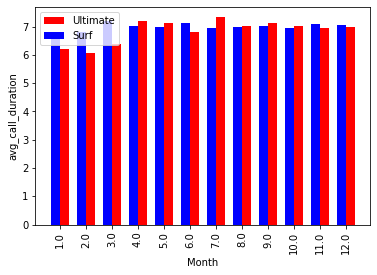

In [51]:
fig, ax = plt.subplots()

index = np.arange(len(avg_min_surf['month']))
bar_width = 0.35
opacity = 0.8

ax.bar(index, avg_min_ult['avg_call_duration'], color='r', align='edge', width=bar_width, label = 'Ultimate')
ax.bar(index, avg_min_surf['avg_call_duration'], color='b', align='edge', width=-bar_width,label = 'Surf')

# Assign the tick labels
ax.set_xticks(index)
ax.set_xticklabels(avg_min_ult['month'], rotation=90)

plt.xlabel('Month')
plt.ylabel('avg_call_duration')
plt.legend()
plt.show()

In [52]:
users_complete

,user_id,plan,city,month,calls_count,total_minutes,message_count,data_usage_mb,avg_call_duration
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",12.0,16.0,124.0,11.0,1901.47,7.750000
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",8.0,27.0,182.0,30.0,6919.15,6.740741
2,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",9.0,49.0,315.0,44.0,13314.82,6.428571
3,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",10.0,65.0,393.0,53.0,22330.49,6.046154
4,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",11.0,64.0,426.0,36.0,18504.30,6.656250
...,...,...,...,...,...,...,...,...,...
2298,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",12.0,39.0,339.0,NaN,23137.69,8.692308
2299,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",9.0,41.0,346.0,NaN,12984.76,8.439024
2300,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",10.0,53.0,385.0,NaN,19492.43,7.264151
2301,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",11.0,45.0,308.0,NaN,16813.83,6.844444


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
I can advise to always use .head/.tail/.sample to limit the output from the table, as some tools could try to print all rows in your data.

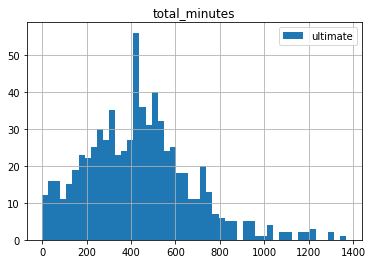

In [53]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
ultimate=users_complete.loc[users_complete['plan'] == 'ultimate']
ultimate.hist('total_minutes', bins=50, label= 'ultimate')
plt.legend();

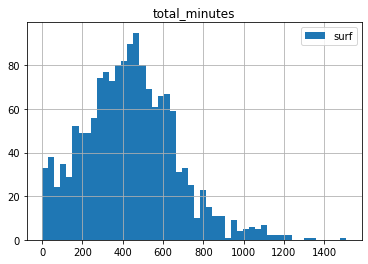

In [54]:
surf=users_complete.loc[users_complete['plan'] == 'surf']
surf.hist('total_minutes', bins=50, label= 'surf')
plt.legend();

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Can you please add axis labels to your graphs? 

Now I will calculate the variance and the means for the average call duration to give me an idea of user behavior between plans. 

In [55]:
surf['avg_call_duration'].mean()

7.158129850659148

In [56]:
np.var(surf['avg_call_duration'])

1.2267282557007997

In [57]:
ultimate['avg_call_duration'].mean()

7.078557173137358

In [58]:
np.var(ultimate['avg_call_duration'])

0.9141908573365181

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
It's great that you managed to calculate all the necessary metrics and display them.

There is also a way to display all statistical metrics in one table (you can pass all metrics to aggfunc at once.), using, for example, pivot_table:

`data.pivot_table(index= 'tariff', values= '...', aggfunc= ['mean', 'var','std', 'median'])`

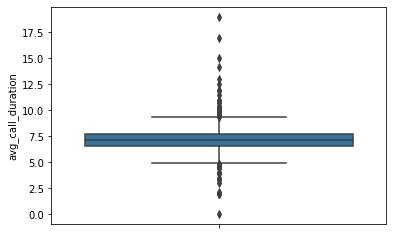

In [59]:
sns.boxplot(y=surf['avg_call_duration'])

plt.show()


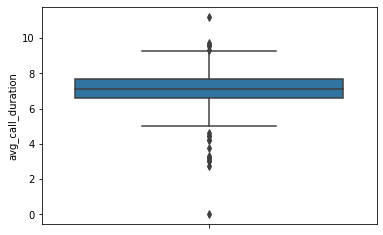

In [60]:
sns.boxplot(y=ultimate['avg_call_duration'])

plt.show()


Based on these graphs and the descriptive statistics I do not see any significant difference between user behavior on each plan. 

### Messages

In [61]:
surf['message_count'].mean()


40.10965630114566

In [62]:
np.var(surf['message_count'])

1090.4511506183685

In [63]:
ultimate['message_count'].mean()

46.29623287671233

In [64]:
np.var(ultimate['message_count'])


1083.3249173156314

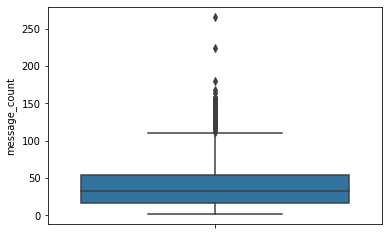

In [65]:
sns.boxplot(y=surf['message_count'])

plt.show()


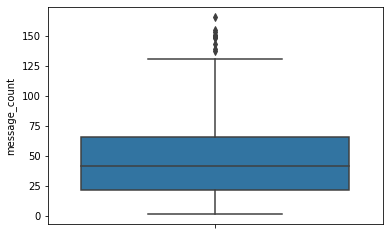

In [66]:
sns.boxplot(y=ultimate['message_count'])

plt.show()


people with the ultimate plan seem to send a more text messages than surf users. 

### Internet

In [67]:
surf['data_usage_mb'].mean()

16717.702137355584

In [68]:
np.var(surf['data_usage_mb'])

62128323.16300871

In [69]:
ultimate['data_usage_mb'].mean()

17238.642253129346

In [70]:
np.var(ultimate['data_usage_mb'])

61239556.12006475

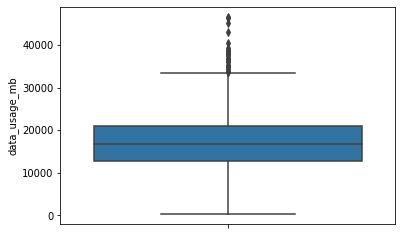

In [71]:
sns.boxplot(y=ultimate['data_usage_mb'])

plt.show()


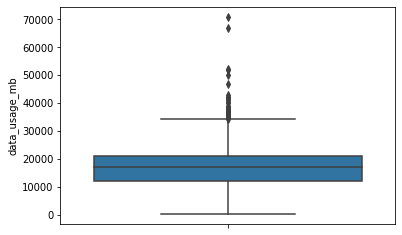

In [72]:
sns.boxplot(y=surf['data_usage_mb'])

plt.show()


The behavior between plans is pretty similar for data usage. 

## Revenue

In [73]:
monthly_revenue_surf= pd.pivot_table(surf_table, values='total_cost', index='month', aggfunc='mean')
monthly_revenue_surf

,total_cost
month,
1.0,20.000000
2.0,34.396667
3.0,45.941304
4.0,40.710600
5.0,47.628182
6.0,49.276289
7.0,62.674050
8.0,63.931173
9.0,58.271495


In [74]:
monthly_revenue_ult= pd.pivot_table(ultimate_table, values='total_cost', index='month', aggfunc='mean')
monthly_revenue_ult

,total_cost
month,
1.0,70.000000
2.0,70.000000
3.0,74.666667
4.0,73.000000
5.0,70.724138
6.0,71.638298
7.0,71.898305
8.0,72.859155
9.0,72.034884


In [75]:
surf_table['total_cost'].mean()

60.706408137317226

In [76]:
ultimate_table['total_cost'].mean()

72.31388888888888

In [77]:
np.var(ultimate_table['total_cost'])

129.66814043209877

In [78]:
np.var(surf_table['total_cost'])

3065.8848438690247

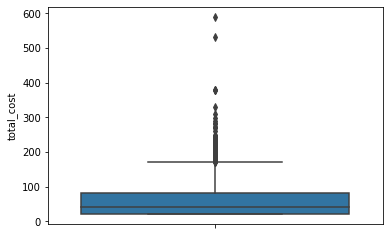

In [79]:
sns.boxplot(y=surf_table['total_cost'])

plt.show()


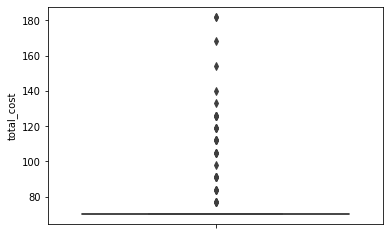

In [80]:
sns.boxplot(y=ultimate_table['total_cost'])

plt.show()

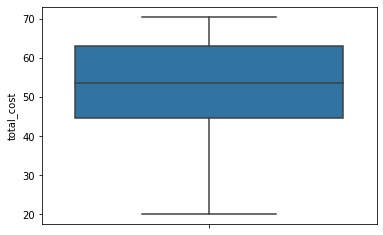

In [81]:
sns.boxplot(y=monthly_revenue_surf['total_cost'])

plt.show()


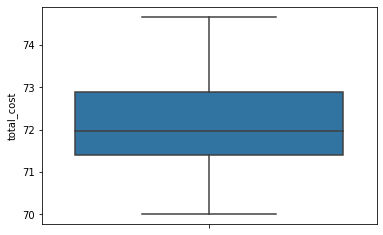

In [82]:
sns.boxplot(y=monthly_revenue_ult['total_cost'])

plt.show()

Based on the average monthly revenue between plans: The Ultimate plan is bringing in significantly more revenue. 

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. Great that you used different graph types to check available data.


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
- Additionally could be interesting to add both plans on one graph.
- If you have time and willing to practice, you can display two charts (histogram and a box plot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## Test statistical hypotheses

 First I will test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

H₀= there is no difference between the average revenue of the Ultimate plan and the average revenue of the Surf plan.

H₁=there is a difference between the average revenues in the plans

I will use the independent ttest to test these hypothesis.

The alpha value will be 0.05.

In [83]:
master_table=pd.concat([surf_table,ultimate_table], ignore_index=True, sort=False)

In [84]:
master_table=master_table.merge(users_data)
master_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2293 non-null   int64         
 1   month              2293 non-null   float64       
 2   plan               2293 non-null   object        
 3   avg_call_duration  2293 non-null   float64       
 4   data_usage_mb      2293 non-null   float64       
 5   message_count      2293 non-null   float64       
 6   total_minutes      2293 non-null   float64       
 7   data_usage_gb      2293 non-null   float64       
 8   message_cost       2293 non-null   float64       
 9   data_cost          2293 non-null   float64       
 10  minute_cost        2293 non-null   float64       
 11  plan_cost          2293 non-null   int64         
 12  total_cost         2293 non-null   float64       
 13  first_name         2293 non-null   object        
 14  last_nam

In [85]:
master_table.head()

,user_id,month,plan,avg_call_duration,data_usage_mb,message_count,total_minutes,data_usage_gb,message_cost,data_cost,minute_cost,plan_cost,total_cost,first_name,last_name,age,city,reg_date,churn_date
0,1001,8.0,surf,6.740741,6919.15,30.0,182.0,7.0,0.00,0.0,0.0,20,20.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0
1,1001,9.0,surf,6.428571,13314.82,44.0,315.0,14.0,0.00,0.0,0.0,20,20.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0
2,1001,10.0,surf,6.046154,22330.49,53.0,393.0,22.0,0.09,70.0,0.0,20,90.09,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0
3,1001,11.0,surf,6.656250,18504.30,36.0,426.0,19.0,0.00,40.0,0.0,20,60.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0
4,1001,12.0,surf,7.357143,19369.18,44.0,412.0,19.0,0.00,40.0,0.0,20,60.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0


In [86]:
total_avg_revenue= master_table['total_cost'].mean()
master_table['total_cost'].median()

70.0

In [87]:
surf_avg_revenue= master_table[master_table['plan']== 'surf']['total_cost'].mean()


In [88]:
ult_avg_revenue=master_table[master_table['plan']== 'ultimate']['total_cost'].mean()


In [89]:
surf = monthly_revenue_surf['total_cost']

ultimate = monthly_revenue_ult['total_cost']

alpha= 0.05

results = st.ttest_ind(surf,ultimate)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

p-value: 7.83119144714113e-05
We reject the null hypothesis


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Additionally, could be interesting to show/visualize selected samples with mean values.

 We can reject the null hypothesis that the average revenue is the same. Therefore we can accept that the alternative hypothesis is true, there is a significant difference in revenue between the ultimate and surf plans. 

Now I will test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions
H₀= there is no difference between the average revenue of users in the NY-NJ area and that of the users from the other regions

H₁=there is a difference between the average revenues of users in the NY-NJ area and that of the users from the other regions

I will use the independent ttest to test these hypothesis.

The alpha value will be 0.05.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Overall great job! Hypotheses have been formulated and tested correctly. 

In [90]:
NY_NJ=master_table.loc[master_table['city'].str.contains('NY-NJ')]
NY_NJ_avg_revenue = pd.pivot_table(NY_NJ, values='total_cost', index='month')
NY_NJ_avg_revenue

,total_cost
month,
2.0,45.000000
3.0,41.140000
4.0,41.119286
5.0,47.965000
6.0,45.941600
7.0,53.747879
8.0,58.053171
9.0,60.115745
10.0,69.107170


In [91]:
avg_revenue_master= pd.pivot_table(master_table, values='total_cost', index='month')
avg_revenue_master

,total_cost
month,
1.0,53.333333
2.0,49.973125
3.0,55.790000
4.0,50.260986
5.0,53.946887
6.0,56.575000
7.0,65.697556
8.0,66.651717
9.0,62.498821


In [92]:
other = avg_revenue_master['total_cost']

NYNJ =NY_NJ_avg_revenue['total_cost']

alpha= 0.05

results = st.ttest_ind(other,NYNJ)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

p-value: 0.13479967352645303
We cant reject the null hypothesis


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
This is also correct.
    
You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)

## General conclusion

I have cleaned, enriched, and examined these data. I am confident in concluding based on my statisitical tests, descriptive statistics and data visualizations I was able to generate, that the Ultimate plan generated significantly more revenue in 2018 than did the Surf plan. Additionally, there is no significant difference in revenue between users in the NY-NJ area and the users in the other areas of use. 

Thank you again for your time reviewing my project :)

<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v1:</b>
    
- Overall you conducted great research with correct interim findings, clean code and nice visualisation.
- Nevertheless, general conclusions represent the overall work progress that you achieved. On a real project, this is probably the only thing the business stakeholders will read. Therefore, it is crucial to indicate in a structured way all conclusions that you made on each step in the project. It is also important to provide explanations and interpretations that will be interesting for business based on your analysis (a detailed description of the average user per each plan, which client group brings more additional revenue, which group brings more revenue in the total revenue).